# Sentiment Analysis using Deep Learning in Keras

### Importing Required Libraries

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from numpy import array, asarray, zeros
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten, GlobalMaxPooling1D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt
from keras.layers import Conv1D
from keras.layers import LSTM

### Importing Dataset

Dataset 1 link: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset 2 link: https://github.com/vineetdhanawat/twitter-sentiment-analysis/blob/master/datasets/Sentiment%20Analysis%20Dataset%20100000.csv

In [2]:
df = []
df.append(pd.read_csv('data/IMDB Dataset.csv', nrows = 10000))
df.append(pd.read_csv('data/Sentiment Analysis Dataset 100000.csv', encoding = 'latin-1', nrows = 10000))
df[1].drop(['ItemID'], axis = 'columns', inplace = True)

In [3]:
df[0].head(5)

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df[1].head(5)

,sentiment,text
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [5]:
df[0]['text'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
df[1]['text'][0]

'                     is so sad for my APL friend.............'

In [7]:
for i in df:
    print(i.isnull().values.any())

False
False


<AxesSubplot:xlabel='sentiment', ylabel='count'>

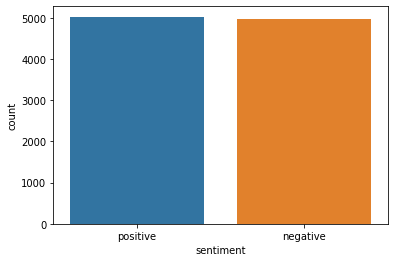

In [8]:
sns.countplot(x = 'sentiment', data = df[0])

<AxesSubplot:xlabel='sentiment', ylabel='count'>

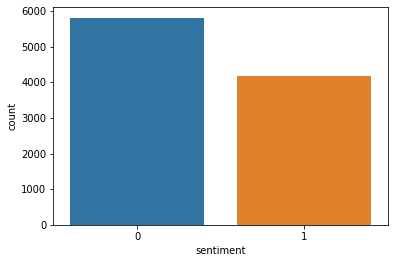

In [9]:
sns.countplot(x = 'sentiment', data = df[1])

## Data Processing

#### Dataset 1 Cleaning

In [10]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_html_tags(sen):
    return TAG_RE.sub('', sen)

In [11]:
def data_processing_1(sen):
    sen = remove_html_tags(sen) # remove html tag
    sen = sen.replace('n\'t', ' not') # convert n't to not
    sen = re.sub(r"\s+[a-zA-Z]\s+", ' ', sen) # remove single letter
    sen = re.sub(r'\s+', ' ', sen) # remove multiple spaces
    sen = re.sub(r'[.]+', '.', sen) # remove multiple dots
    sen = sen.replace('\\\'', ' ') # remove \
    return sen

In [12]:
X = [["0"]*10000]*3

In [13]:
sentences = list(df[0]['text'])
i = 0

for sen in sentences:
    X[0][i] = data_processing_1(sen)
    i = i + 1

X[0] = np.array(list(X[0]))

In [14]:
for i in range(0, 3):
    print(X[0][i], end = '\n\n')

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many.Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more.so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows would not

In [15]:
y = [[0]*10000]*3
y[0] = df[0]['sentiment']
y[0] = np.array(list(map(lambda x: 1 if x == "positive" else 0, y[0])))

In [16]:
for i in range(0, 5):
    print(y[0][i], end = ', ')

1, 1, 1, 0, 1, 

In [17]:
print(np.shape(X[0]))
print(np.shape(y[0]))

(10000,)
(10000,)


#### Dataset 2 Cleaning

In [18]:
def data_processing_2(sen):
    sen = sen.replace('&quot;3', '')
    sen = sen.replace('&quot;', '')
    sen = sen.replace('&lt;3', '')
    sen = sen.replace('&lt;', '')
    sen = sen.replace('&gt;', '')
    sen = re.sub('http[s]?://\S+', '', sen)
    sen = re.sub('[a-zA-Z0-9]*@[a-zA-Z0-9]*', '', sen)
    sen = sen.replace('an\'t', 'an not')
    sen = sen.replace('n\'t', ' not')
    sen = re.sub(r"\s+[A-Z]\s+", ' ', sen)
    sen = re.sub(r'[.]+', '.', sen)
    sen = re.sub(r'\s+', ' ', sen)
    sen = re.sub(r'[-]+', ' ', sen)
    return sen

In [19]:
sentences = list(df[1]['text'])
i = 0

for sen in sentences:
    X[1][i] = data_processing_2(sen)
    i = i + 1
    
X[1] = np.array(list(X[1]))

In [20]:
y[1] = np.array(list(df[1]['sentiment']))

In [21]:
for i in range(0, 10):
    print(y[1][i], end = ',')

0,0,1,0,0,0,1,0,1,1,

In [22]:
print(np.shape(X[1]))
print(np.shape(y[1]))

(10000,)
(10000,)


#### Combine Dataset

In [23]:
for i in range(0, 5000):
    X[2][i] = X[0][i]
    y[2][i] = y[0][i]
for i in range(5000, 10000):
    X[2][i] = X[1][i]
    y[2][i] = y[1][i]
    
X[2] = np.array(X[2])
y[2] = np.array(y[2])

In [24]:
print(np.shape(X[2]))
print(np.shape(y[2]))

(10000,)
(10000,)


In [25]:
for sen in range(0, 3):
    print(y[2][sen], X[2][sen], end = '\n\n')
for sen in range(5000, 5003):
    print(y[2][sen], X[2][sen], end = '\n\n')

1 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many.Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more.so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows would n

#### Dataset splitting to train and test

In [26]:
X_train = [[]] * 3
X_test = [[]] * 3
y_train = [[]] * 3
y_test = [[]] * 3

In [27]:
for i in range(0, 3):
    print('dataset ', i+1, ': ', np.shape(X[i]), ', ', np.shape(y[i]), end = '\n')

dataset  1 :  (10000,) ,  (10000,)
dataset  2 :  (10000,) ,  (10000,)
dataset  3 :  (10000,) ,  (10000,)


In [28]:
for i in range(0, 3):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(
        X[i], y[i], test_size = 0.25,
        random_state = 42
    )

In [29]:
for i in range(0, 10):
    print(i, ': ', y_test[1][i], ' --> ', X_train[1][i])

0 :  0  -->  #f1 Rubens knows he has lost any chance of the world championship
1 :  0  -->  #3turnoffwords   Isit in yet
2 :  1  -->  #FollowFriday is a ferociously gifted writer whose books &amp; Tweets are magical must reads. Follow &amp; you'll LOVE her too
3 :  0  -->  My heart sings when think of youuu haha that's all keep singing today. I'm craving cheeto puffs unhealthy!
4 :  0  -->   guys are pricks. gonna have an early night and cry til i fall asleep. fuck you all.
5 :  1  -->  #faviphoneapp Black Book. But since only have a Touch it's not as fun. But it's still a great junt organizer
6 :  0  -->  #musicmonday Crossfire   On Fire
7 :  1  -->  #3wordsaftersex 'I broke it?!?!' lol
8 :  0  -->  ! .sooo, any hope for a match up with Liz Cheney and Mikas Daddy? thx!! Ratings Gold I'm sure!! 
9 :  0  -->   u guys knw whyy


### Preparing Embedding Layer

In [30]:
tokenizer = Tokenizer(num_words = 50000)

for i in range(3):
    tokenizer.fit_on_texts(X_train[i])

In [31]:
for i in range(3):
    X_train[i] = tokenizer.texts_to_sequences(X_train[i])

In [32]:
for i in range(3):
    X_test[i] = tokenizer.texts_to_sequences(X_test[i])

In [33]:
maxlen = 100
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

57961


In [34]:
for i in range(3):
    X_train[i] = pad_sequences(
        X_train[i],
        padding = 'post',
        maxlen = maxlen
    )

In [35]:
for i in range(3):
    X_test[i] = pad_sequences(
        X_test[i],
        padding = 'post',
        maxlen = maxlen
    )

#### glove.6B.100d.txt Dataset for GloVe Embedding

dataset link: https://www.kaggle.com/danielwillgeorge/glove6b100dtxt

In [36]:
embed_dictionary = dict()
glv_file = open('data/glove.6B.100d.txt', encoding='utf8')

In [37]:
for line in glv_file:
    records = line.split()
    word = records[0]
    vector_dim = asarray(records[1:], dtype='float32')
    embed_dictionary[word] = vector_dim
glv_file.close()

In [38]:
embed_matrix = zeros((vocab_size, 100))

In [39]:
for word, index in tokenizer.word_index.items():
    embed_vector = embed_dictionary.get(word)
    if embed_vector is not None:
        embed_matrix[index] = embed_vector

In [40]:
embed_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

## Text Classification with Simple Neural Network

In [41]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(Flatten())

In [42]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)

In [43]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          5796100   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 5,806,101
Trainable params: 10,001
Non-trainable params: 5,796,100
_________________________________________________________________


In [45]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 1s 11ms/step - loss: 0.6925 - acc: 0.5907 - val_loss: 0.6186 - val_acc: 0.6573
Epoch 2/6
47/47 [==============================] - 0s 6ms/step - loss: 0.5245 - acc: 0.7500 - val_loss: 0.6090 - val_acc: 0.6673
Epoch 3/6
47/47 [==============================] - 0s 6ms/step - loss: 0.4504 - acc: 0.8112 - val_loss: 0.5855 - val_acc: 0.6880
Epoch 4/6
47/47 [==============================] - 0s 6ms/step - loss: 0.3977 - acc: 0.8417 - val_loss: 0.5799 - val_acc: 0.6960
Epoch 5/6
47/47 [==============================] - 0s 7ms/step - loss: 0.3576 - acc: 0.8663 - val_loss: 0.5831 - val_acc: 0.6933
Epoch 6/6
47/47 [==============================] - 0s 7ms/step - loss: 0.3253 - acc: 0.8908 - val_loss: 0.5698 - val_acc: 0.6953
Epoch 1/6
47/47 [==============================] - 0s 10ms/step - loss: 0.6423 - acc: 0.6285 - val_loss: 0.6191 - val_acc: 0.6573
Epoch 2/6
47/47 [==============================] - 0s 6ms/step - loss: 0.5984 - acc: 0.6852 - v

In [46]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 0s 851us/step - loss: 0.3843 - acc: 0.8493

dataset 1: loss - 0.36317798495292664, acc - 0.8518666625022888

dataset 2: loss - 0.5614890456199646, acc - 0.7178666591644287

dataset 3: loss - 0.384299099445343, acc - 0.8493333458900452


In [47]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 0s 814us/step - loss: 0.6645 - acc: 0.6684

dataset 1: loss - 0.6849325895309448, acc - 0.6899999976158142

dataset 2: loss - 0.6354695558547974, acc - 0.6488000154495239

dataset 3: loss - 0.6644997000694275, acc - 0.66839998960495


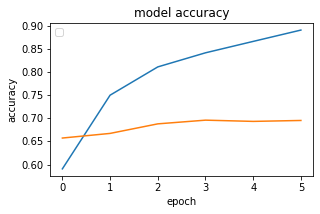

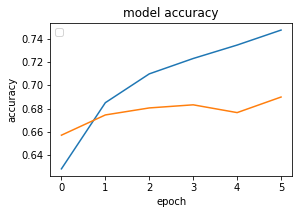

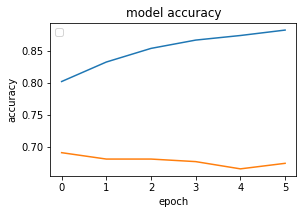

In [48]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

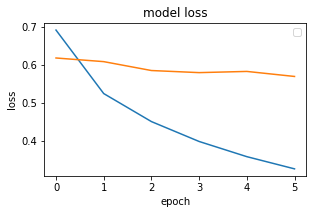

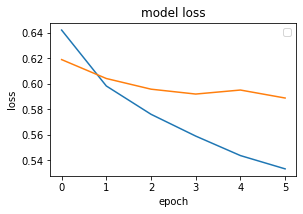

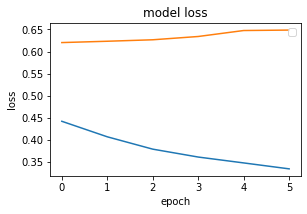

In [49]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with CNN

## Text Classification with LSTM

In [50]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(LSTM(128))

In [51]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 5,913,477
Trainable params: 117,377
Non-trainable params: 5,796,100
_________________________________________________________________


In [53]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 15s 316ms/step - loss: 0.6483 - acc: 0.6265 - val_loss: 0.6020 - val_acc: 0.6927
Epoch 2/6
47/47 [==============================] - 12s 264ms/step - loss: 0.5519 - acc: 0.7228 - val_loss: 0.5181 - val_acc: 0.7513
Epoch 3/6
47/47 [==============================] - 12s 265ms/step - loss: 0.5213 - acc: 0.7433 - val_loss: 0.4885 - val_acc: 0.7720
Epoch 4/6
47/47 [==============================] - 16s 343ms/step - loss: 0.4878 - acc: 0.7667 - val_loss: 0.4597 - val_acc: 0.7820
Epoch 5/6
47/47 [==============================] - 15s 326ms/step - loss: 0.4814 - acc: 0.7710 - val_loss: 0.4490 - val_acc: 0.7940
Epoch 6/6
47/47 [==============================] - 15s 327ms/step - loss: 0.4499 - acc: 0.7865 - val_loss: 0.4345 - val_acc: 0.7993
Epoch 1/6
47/47 [==============================] - 15s 326ms/step - loss: 0.6827 - acc: 0.5827 - val_loss: 0.6824 - val_acc: 0.5733
Epoch 2/6
47/47 [==============================] - 22s 458ms/step - loss: 0.

In [54]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 5s 20ms/step - loss: 0.4731 - acc: 0.7789

dataset 1: loss - 0.4177885949611664, acc - 0.8145333528518677

dataset 2: loss - 0.5735248327255249, acc - 0.7364000082015991

dataset 3: loss - 0.47305428981781006, acc - 0.7789333462715149


In [55]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 2s 20ms/step - loss: 0.5383 - acc: 0.7452

dataset 1: loss - 0.49267593026161194, acc - 0.7760000228881836

dataset 2: loss - 0.5940758585929871, acc - 0.7203999757766724

dataset 3: loss - 0.5382635593414307, acc - 0.745199978351593


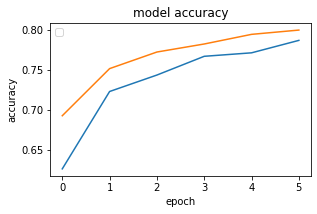

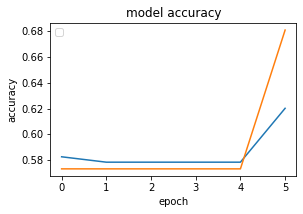

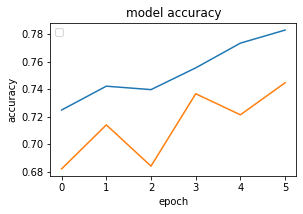

In [56]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

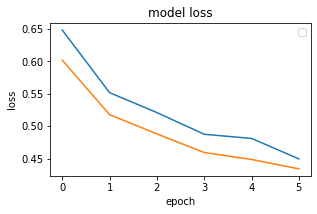

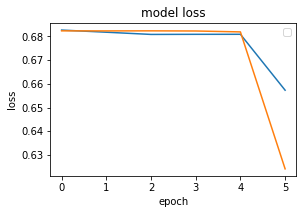

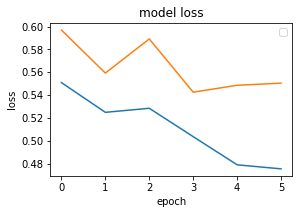

In [57]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with Bi-Directional LSTM

In [58]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

model = Sequential()
embed_layer = Embedding(
    vocab_size,
    100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(
    Bidirectional(
        LSTM(
            100,
            return_sequences = True,
            dropout = 0.50
        ),
        merge_mode = 'concat'
    )
)
model.add(
    TimeDistributed(
        Dense(
            100,
            activation = 'sigmoid'
        )
    )
)
model.add(Flatten())

In [59]:
model.add(
    Dense(
        100,
        activation = 'sigmoid'
    )
)
model.add(
    Dense(
        3,
        activation = 'softmax'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 200)          160800    
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 100)          20100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1000100   
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 303       
Total params: 6,977,403
Trainable params: 1,181,303
Non-trainable params: 5,796,100
____________________________________

In [61]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 11s 236ms/step - loss: 1.2885 - acc: 0.4260 - val_loss: 1.0186 - val_acc: 0.4960
Epoch 2/6
47/47 [==============================] - 11s 230ms/step - loss: 0.8285 - acc: 0.5027 - val_loss: 0.7553 - val_acc: 0.5040
Epoch 3/6
47/47 [==============================] - 13s 271ms/step - loss: 0.7515 - acc: 0.3962 - val_loss: 0.7548 - val_acc: 0.4960
Epoch 4/6
47/47 [==============================] - 10s 223ms/step - loss: 0.7511 - acc: 0.4935 - val_loss: 0.7548 - val_acc: 0.5040
Epoch 5/6
47/47 [==============================] - 14s 300ms/step - loss: 0.7511 - acc: 0.4188 - val_loss: 0.7548 - val_acc: 0.5040
Epoch 6/6
47/47 [==============================] - 15s 310ms/step - loss: 0.7511 - acc: 0.4118 - val_loss: 0.7548 - val_acc: 0.4960
Epoch 1/6
47/47 [==============================] - 13s 269ms/step - loss: 0.6976 - acc: 0.4300 - val_loss: 0.7012 - val_acc: 0.5373
Epoch 2/6
47/47 [==============================] - 10s 218ms/step - loss: 0.

In [62]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 5s 23ms/step - loss: 0.7691 - acc: 0.2293

dataset 1: loss - 0.7518537640571594, acc - 0.01080000028014183

dataset 2: loss - 0.6983428597450256, acc - 0.5774666666984558

dataset 3: loss - 0.7691359519958496, acc - 0.2293333262205124


In [63]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 2s 25ms/step - loss: 0.7592 - acc: 0.2380

dataset 1: loss - 0.760356068611145, acc - 0.009200000204145908

dataset 2: loss - 0.6879917979240417, acc - 0.5920000076293945

dataset 3: loss - 0.7592472434043884, acc - 0.23800000548362732


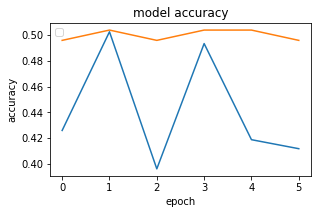

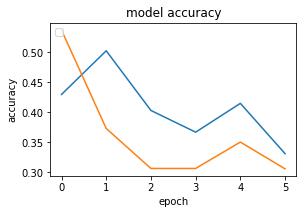

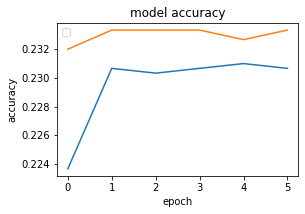

In [64]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

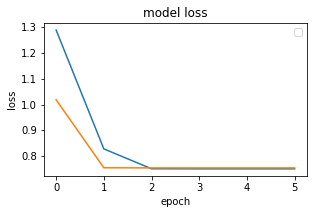

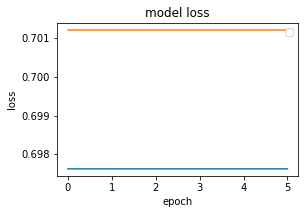

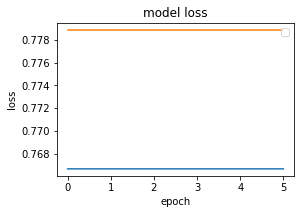

In [65]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with GRU

In [66]:
from keras.layers.recurrent import GRU

In [67]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(
    GRU(256)
)

In [68]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
gru (GRU)                    (None, 256)               274944    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 6,071,301
Trainable params: 275,201
Non-trainable params: 5,796,100
_________________________________________________________________


In [70]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 14s 306ms/step - loss: 0.6584 - acc: 0.6063 - val_loss: 0.6503 - val_acc: 0.6140
Epoch 2/6
47/47 [==============================] - 20s 433ms/step - loss: 0.5568 - acc: 0.7110 - val_loss: 0.5429 - val_acc: 0.7407
Epoch 3/6
47/47 [==============================] - 16s 347ms/step - loss: 0.4663 - acc: 0.7867 - val_loss: 0.4488 - val_acc: 0.8093
Epoch 4/6
47/47 [==============================] - 13s 281ms/step - loss: 0.4511 - acc: 0.7907 - val_loss: 0.4084 - val_acc: 0.8173
Epoch 5/6
47/47 [==============================] - 13s 272ms/step - loss: 0.3941 - acc: 0.8205 - val_loss: 0.4185 - val_acc: 0.8033
Epoch 6/6
47/47 [==============================] - 13s 277ms/step - loss: 0.3790 - acc: 0.8283 - val_loss: 0.3911 - val_acc: 0.8287
Epoch 1/6
47/47 [==============================] - 13s 272ms/step - loss: 0.6886 - acc: 0.5778 - val_loss: 0.6824 - val_acc: 0.5733
Epoch 2/6
47/47 [==============================] - 13s 270ms/step - loss: 0.

In [71]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 8s 35ms/step - loss: 0.4250 - acc: 0.7913

dataset 1: loss - 0.3470296859741211, acc - 0.8503999710083008

dataset 2: loss - 0.568907618522644, acc - 0.7210666537284851

dataset 3: loss - 0.42503830790519714, acc - 0.7913333177566528


In [72]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 3s 32ms/step - loss: 0.5362 - acc: 0.7384

dataset 1: loss - 0.4740312397480011, acc - 0.7911999821662903

dataset 2: loss - 0.5990695357322693, acc - 0.7052000164985657

dataset 3: loss - 0.5361627340316772, acc - 0.7383999824523926


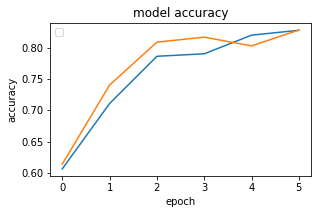

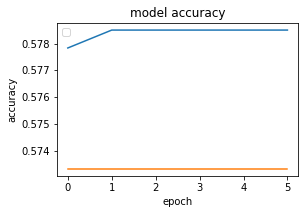

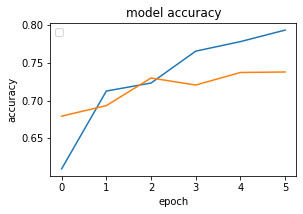

In [73]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

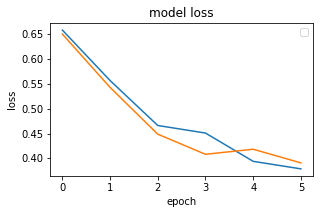

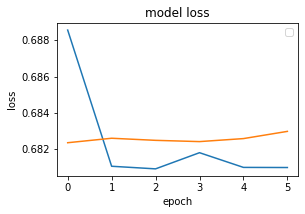

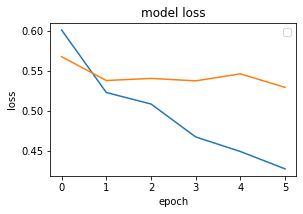

In [74]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

In [77]:
model = Sequential()

embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)

model.add(
    Conv1D(128, 5,
        activation = 'relu'
    )
)
model.add(GlobalMaxPooling1D())
model.add(
    Dense(1,
          activation = 'sigmoid'
    )
)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 5,860,357
Trainable params: 64,257
Non-trainable params: 5,796,100
_________________________________________________________________


In [78]:
model.save('model.m5')

INFO:tensorflow:Assets written to: model.m5/assets


In [79]:
hist = [[]] * 3

for i in range(3):
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 6,
        verbose = 1,
        validation_split = 0.2
    )

Epoch 1/6
47/47 [==============================] - 2s 42ms/step - loss: 0.6406 - accuracy: 0.6342 - val_loss: 0.5582 - val_accuracy: 0.7380
Epoch 2/6
47/47 [==============================] - 2s 51ms/step - loss: 0.4887 - accuracy: 0.8023 - val_loss: 0.4852 - val_accuracy: 0.7887
Epoch 3/6
47/47 [==============================] - 2s 45ms/step - loss: 0.4036 - accuracy: 0.8470 - val_loss: 0.4428 - val_accuracy: 0.8060
Epoch 4/6
47/47 [==============================] - 3s 58ms/step - loss: 0.3424 - accuracy: 0.8762 - val_loss: 0.4221 - val_accuracy: 0.8100
Epoch 5/6
47/47 [==============================] - 2s 41ms/step - loss: 0.2989 - accuracy: 0.8987 - val_loss: 0.4308 - val_accuracy: 0.7967
Epoch 6/6
47/47 [==============================] - 2s 42ms/step - loss: 0.2590 - accuracy: 0.9182 - val_loss: 0.4047 - val_accuracy: 0.8127
Epoch 1/6
47/47 [==============================] - 2s 40ms/step - loss: 0.6254 - accuracy: 0.6783 - val_loss: 0.5808 - val_accuracy: 0.6993
Epoch 2/6
47/47 [===

In [80]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

235/235 [==============================] - 1s 5ms/step - loss: 0.1942 - accuracy: 0.9465

dataset 1: loss - 0.23094239830970764, acc - 0.9158666729927063

dataset 2: loss - 0.3047662675380707, acc - 0.887333333492279

dataset 3: loss - 0.19415146112442017, acc - 0.9465333223342896


In [81]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

79/79 [==============================] - 0s 5ms/step - loss: 0.5148 - accuracy: 0.7660

dataset 1: loss - 0.43845272064208984, acc - 0.7979999780654907

dataset 2: loss - 0.5981062054634094, acc - 0.729200005531311

dataset 3: loss - 0.514782726764679, acc - 0.765999972820282


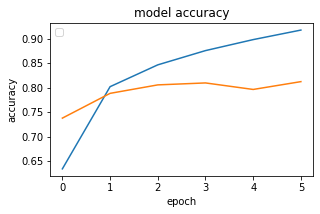

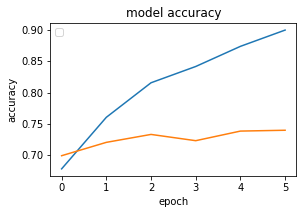

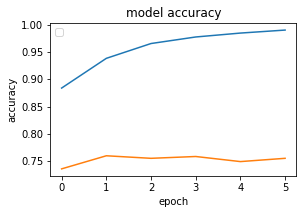

In [82]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['accuracy'])
    plt.plot(hist[i].history['val_accuracy'])
    plt.tight_layout(pad=1.0)

plt.show()

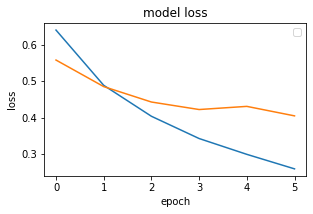

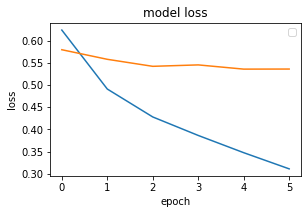

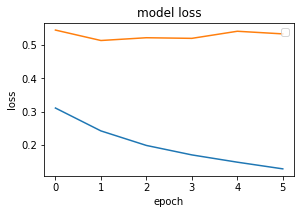

In [83]:
for i in range(3):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

In [86]:
def predictions(text):
  text1 = tokenizer.texts_to_sequences(text)
  text2 = pad_sequences(
        text1,
        padding = 'post',
        maxlen = maxlen
    )
  pred = model.predict(text2)
  return 'positive' if pred[0] >= 0.5 else 'negative'

In [92]:
predictions(["Wade.Grad.Hot.Bald. Your not gonna shave your head! Uh. Yeah.I hot.get babes Hahahaha man love Wade!"])

'positive'

In [93]:
predictions(["waaaaahhh. ohyeah i had something to do eeee. haha"])

'negative'

In [94]:
predictions(["This is very bad. You should not do this."])

'negative'

In [95]:
predictions(["I am very happy to hear that."])

'positive'

In [96]:
predictions(["Wow! You look so beautiful."])

'positive'